In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
pass_ID=test['PassengerId']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


C:\Users\HI-TECH\AppData\Local\Temp\ipykernel_5308\4174621242.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


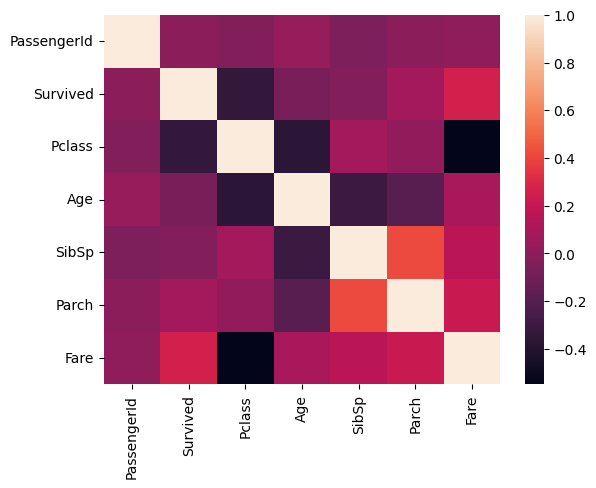

In [10]:
sns.heatmap(train.corr())
plt.show()

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


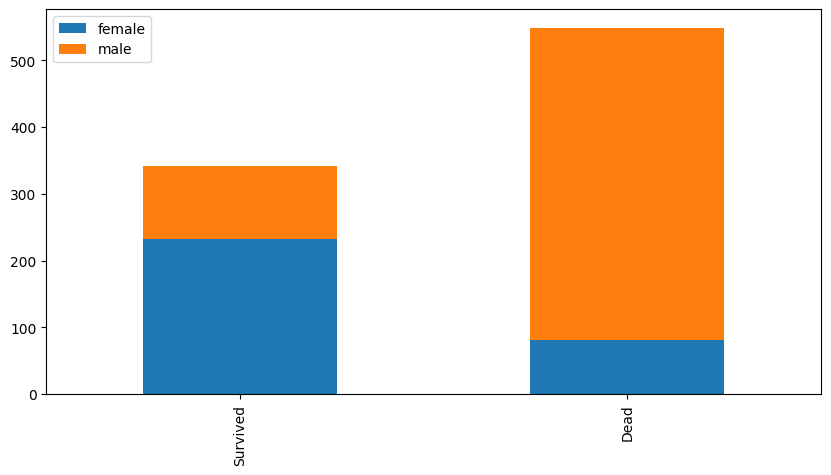

In [12]:
bar_chart('Sex')

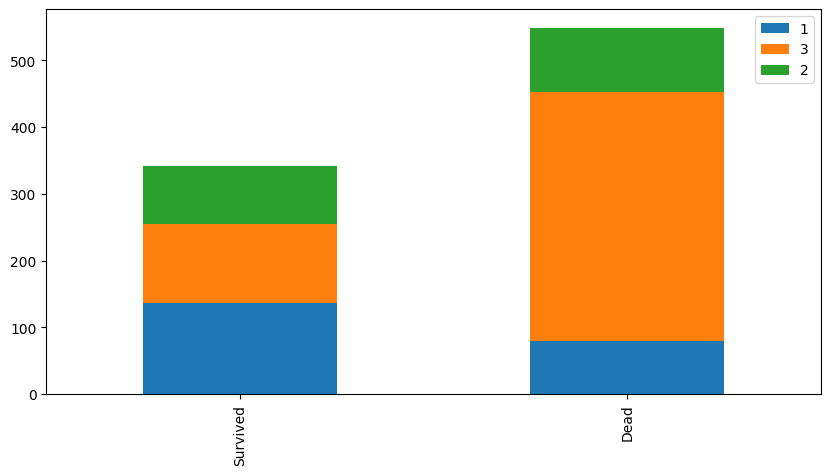

In [13]:
bar_chart("Pclass")

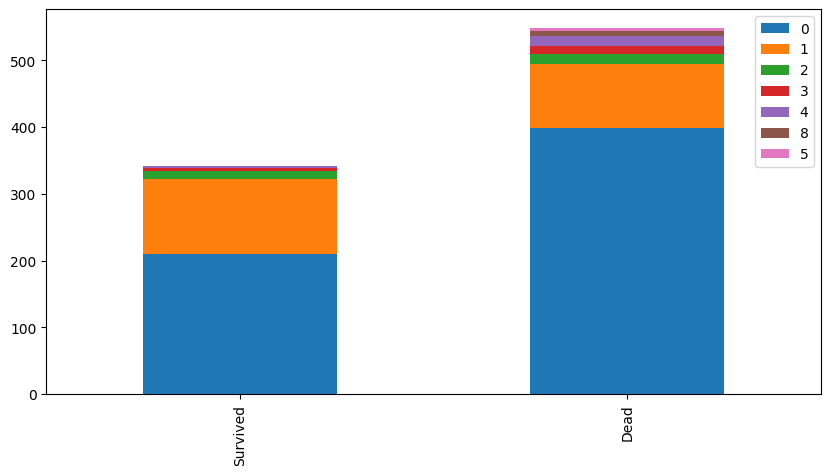

In [14]:
bar_chart("SibSp")

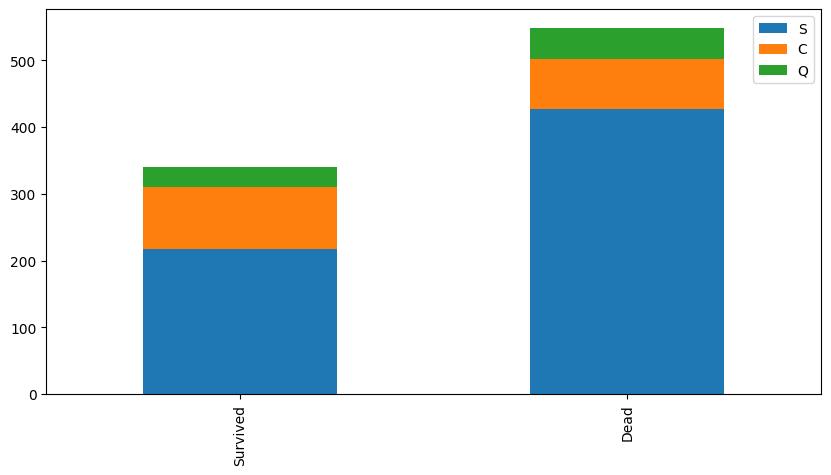

In [15]:
bar_chart("Embarked")

# Feature Engineering

In [16]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [17]:
train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [18]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)


In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [20]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [21]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)


In [22]:
train.loc[train['Age']<=16,'Age']=0
train.loc[(train['Age']>16)&(train['Age']<=26),'Age']=1
train.loc[(train['Age']>26)&(train['Age']<=36),'Age']=2
train.loc[(train['Age']>36)&(train['Age']<=62),'Age']=3
train.loc[train['Age']>62,'Age']=4

In [23]:
test.loc[test['Age']<=16,'Age']=0
test.loc[(test['Age']>16)&(test['Age']<=26),'Age']=1
test.loc[(test['Age']>26)&(test['Age']<=36),'Age']=2
test.loc[(test['Age']>36)&(test['Age']<=62),'Age']=3
test.loc[test['Age']>62,'Age']=4

In [24]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      2.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
886    0.0
887    1.0
888    1.0
889    2.0
890    2.0
Name: Age, Length: 891, dtype: float64

In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2


In [26]:
test["Fare"].fillna(test.groupby("Title")["Fare"].transform("median"), inplace=True)

In [27]:
train.loc[train['Fare']<=17,'Fare']=0
train.loc[(train['Fare']>17)&(train['Fare']<=30),'Fare']=1
train.loc[(train['Fare']>30)&(train['Fare']<=100),'Fare']=2
train.loc[train['Fare']>100,'Fare']=3

In [28]:
test.loc[test['Fare']<=17,'Fare']=0
test.loc[(test['Fare']>17)&(test['Fare']<=30),'Fare']=1
test.loc[(test['Fare']>30)&(test['Fare']<=100),'Fare']=2
test.loc[test['Fare']>100,'Fare']=3

In [29]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])

In [31]:
test['Sex']=le.fit_transform(test['Sex'])

In [32]:
train['Embarked']=le.fit_transform(train['Embarked'])
test['Embarked']=le.fit_transform(test['Embarked'])

In [33]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
Title            int64
dtype: object

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,2,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,C85,0,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,NaN,2,1
3,4,1,1,0,2.0,1,0,113803,2.0,C123,2,2
4,5,0,3,1,2.0,0,0,373450,0.0,NaN,2,0


In [35]:
features_drop = ['Ticket','Cabin','PassengerId']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1.0,1,0,0.0,2,0
1,1,1,0,3.0,1,0,2.0,0,2
2,1,3,0,1.0,0,0,0.0,2,1
3,1,1,0,2.0,1,0,2.0,2,2
4,0,3,1,2.0,0,0,0.0,2,0


In [37]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [38]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1.0,1,0,0.0,2,0
1,1,1,0,3.0,1,0,2.0,0,2
2,1,3,0,1.0,0,0,0.0,2,1
3,1,1,0,2.0,1,0,2.0,2,2
4,0,3,1,2.0,0,0,0.0,2,0


In [39]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,2.0,0,0,0.0,1,0
1,3,0,3.0,1,0,0.0,2,2
2,2,1,3.0,0,0,0.0,1,0
3,3,1,2.0,0,0,0.0,2,0
4,3,0,1.0,1,1,0.0,2,2


# Modelling

In [44]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 


from sklearn.model_selection import cross_val_score

In [47]:
lr=LogisticRegression ()

In [48]:
lr.fit(X_train,y_train)

LogisticRegression()

In [49]:
pred=lr.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7988826815642458

In [51]:
kn=KNeighborsClassifier()

In [52]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
pred1=kn.predict(X_test)

In [54]:
accuracy_score(y_test,pred1)

0.7932960893854749

In [55]:
dt=DecisionTreeClassifier()

In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
pred2=dt.predict(X_test)

In [58]:
accuracy_score(y_test,pred2)

0.7988826815642458

In [59]:
sv=SVC()

In [60]:
sv.fit(X_train,y_train)

SVC()

In [61]:
pred3=sv.predict(X_test)

In [62]:
accuracy_score(y_test,pred3)

0.7988826815642458

In [63]:
prediction=dt.predict(test)

In [64]:
submission=pd.DataFrame({
    "PassengerId":pass_ID,
        "Survived": prediction
})

In [65]:
submission.to_csv('submission.csv', index=False)